In [1]:
from pfp_stat import *

import numpy as np
import pandas as pd 

import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib

import datetime as dat

from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF
import fpdf

from pfp_products import *

import os.path
from scipy.optimize import minimize

In [2]:
def show_me(points_in_year, stat_depth, BAs):
    cors = calc_correlations(BAs, points_in_year, stat_depth)

    for row in range(cors.shape[1]):
        plt.plot(cors[:,row], color = (0.5+0.5*row/cors.shape[1],0.1,0.1), label = str(stat_depth[row]) + ' years history')

    plt.title('"' + BAs[0] + '"' + ' and ' + '"' + BAs[1] + '" correlation')
    #plt.xticks(range(cors.shape[0]), points_in_year) 
    plt.xlabel('точек в году')
    plt.legend()
    plt.axvline(x = 2)
    plt.show()
    
    return

In [3]:
points_in_year = [3, 6, 12, 24, 36, 48, 60, 125, 260]
stat_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
BAs = ['gmkn rx equity',
    'rog sw equity',
    'alrs rx equity',
    'mtss rx equity',
    'yndx rx equity',
    'moex rx equity',
    'open pif',
    'solecmvt index']

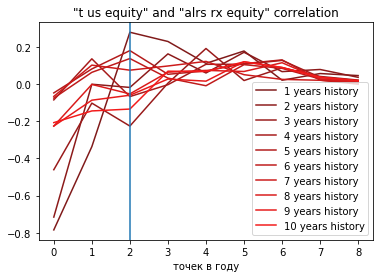

In [4]:
show_me(points_in_year, stat_depth, ['t us equity', 'alrs rx equity'])

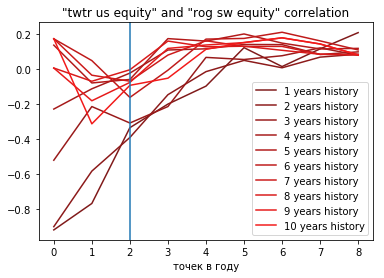

In [5]:
show_me(points_in_year, stat_depth, ['twtr us equity', 'rog sw equity'])

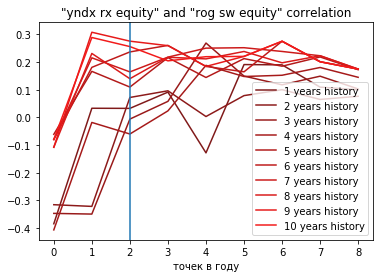

In [6]:
show_me(points_in_year, stat_depth, ['yndx rx equity', 'rog sw equity'])

In [15]:
n_scenarios = 50000
simulation_years = 10 
all_BAs = ['alrs rx equity',
           'solecmvt index',
           'mtss rx equity',
           'yndx rx equity',
           'moex rx equity',
           'rog sw equity',
           'open pif',
           'gmkn rx equity']

returns = ba_scenarios(BAs, 
                       simulation_years,  
                       n_scenarios, 
                       print_statistics = True,
                       points_in_year = 12)

Returns: 
gmkn rx equity    0.080
rog sw equity     0.034
alrs rx equity    0.087
mtss rx equity    0.092
yndx rx equity    0.120
moex rx equity    0.080
open pif          0.120
solecmvt index    0.020
Name: r, dtype: float64
 
Sigmas: 
gmkn rx equity    0.191840
rog sw equity     0.156097
alrs rx equity    0.278227
mtss rx equity    0.249655
yndx rx equity    0.323618
moex rx equity    0.213164
open pif          0.143242
solecmvt index    0.096891
dtype: float32
 
Correlations: 

                gmkn rx equity  rog sw equity  alrs rx equity  mtss rx equity  \
gmkn rx equity        1.000000      -0.124118        0.152530        0.342554   
rog sw equity        -0.124118       1.000000        0.076384       -0.015950   
alrs rx equity        0.152530       0.076384        1.000000        0.283471   
mtss rx equity        0.342554      -0.015950        0.283471        1.000000   
yndx rx equity        0.013790      -0.005998        0.522795        0.170849   
moex rx equity        0.2762

In [14]:
hist = get_hist(BAs, points_in_year = 12, stat_depth = 3)
Returns = np.log((hist/hist.shift(1)).astype(np.float32))
Returns.corr()

,gmkn rx equity,rog sw equity,alrs rx equity,mtss rx equity,yndx rx equity,moex rx equity,open pif,solecmvt index
gmkn rx equity,1.000000,-0.124118,0.152530,0.342554,0.013790,0.276289,0.406332,0.291811
rog sw equity,-0.124118,1.000000,0.076384,-0.015950,-0.005998,0.031895,0.094408,0.011685
alrs rx equity,0.152530,0.076384,1.000000,0.283471,0.522795,0.468895,0.638956,0.134812
mtss rx equity,0.342554,-0.015950,0.283471,1.000000,0.170849,0.299780,0.414267,0.274833
yndx rx equity,0.013790,-0.005998,0.522795,0.170849,1.000000,0.525695,0.620546,0.099164
moex rx equity,0.276289,0.031895,0.468895,0.299780,0.525695,1.000000,0.670502,0.302035
open pif,0.406332,0.094408,0.638956,0.414267,0.620546,0.670502,1.000000,0.074107
solecmvt index,0.291811,0.011685,0.134812,0.274833,0.099164,0.302035,0.074107,1.000000
